to-do: far vedere come varia l'embedding al variare di k, magari fare un breve video con le immagini in sequenza
<h1 style="text-align: center;">ISOMAP</h1>

*(Joshua B. Tenenbaum, Vin de Silva, John C. Langford - 2000)*

ISOMAP è un metodo non-lineare di riduzione della dimensionalità.<br>
Calcola in modo efficiente un embedding a bassa dimensionalità di un insieme di punti ad alta dimensionalità.

L'assunzione di base che facciamo sul dataset a cui applichiamo l'algoritmo è che, anche se i suoi punti sono in uno spazio con molte dimensioni, al loro interno si celi una struttura rappresentabile in uno spazio con molte meno dimensioni.

<img src="media/hand-head.png" alt="hand-head"/>
<p style="text-align: center;"><i>Esempio di riduzione a 2 dimensioni di immagini in 4096 dimensioni (64x64 pixel)</i></p>


L'embedding, che possiamo immaginare come un "appiattimento" del manifold, deve preservare le distanze fra i punti.

L'intuizione alla base di ISOMAP è che in small local regions del manifold le distanze geodesiche fra punti sono ben approssimate dalla loro distanza euclidea.<br>
Per punti lontani invece la distanza euclidea non è adatta, suggerirebbe distanze minori di quelle che effettivamente avremmo percorrendo il manifold.

<img src="media/swiss.png" alt="swiss" width="400"/>
<p style="text-align: center;"><i>Esempio di distanza euclidea (tratteggiata) e distanza geodesica (piena) fra due punti di uno swiss roll</i></p>

<h2 style="text-align: center;">Algoritmo</h2>

<img src="media/teo1.png" alt="swiss" width="650"/>
<img src="media/swiss_knn.png" alt="swiss" width="400"/>
<p style="text-align: center;"><i>Esempio di grafo costruito su uno swiss roll</i></p>
<img src="media/teo2.png" alt="swiss" width="650"/>
<br><br><br><br>
<img src="media/teo6.png" alt="swiss" width="800"/>
<img src="media/holes.png" alt="swiss" width="400"/>
<p style="text-align: center;"><i>Esempio di stima delle distanze distorta a causa di buchi nel manifold</i></p>


<h2 style="text-align: center;">Multidimensional scaling (MDS)</h2>
<img src="media/teo3.png" alt="swiss" width="800"/>

<h4 style="text-align: center;">Classic MDS</h4>
<img src="media/teo4.png" alt="swiss" width="800"/>

<h4 style="text-align: center;">Metric MDS</h4>
<img src="media/teo5.png" alt="swiss" width="800"/>

<h5>Fonti: </h5>

- [J. Tenenbaum, V. de Silva and J. Langford - A global geometric framework for nonlinear dimensionality reduction](http://wearables.cc.gatech.edu/paper_of_week/isomap.pdf "ISOMAPpaper")
- [lezione su ISOMAP di Ulrike von Luxburg (tratta dal Master in Machine Learning dell'Università di Tübingen)](https://www.youtube.com/watch?v=PNcxAbZX5X0 "ISOMAPvideo")
- [lezione su MDS di Ulrike von Luxburg (tratta dal Master in Machine Learning dell'Università di Tübingen)](https://www.youtube.com/watch?v=tJBVC2kzPCY "MDSvideo1")
- [lezione su MDS di Michael Pyrcz, professore dell'Università del Texas a Austin](https://www.youtube.com/watch?v=Yt0o8ukIOKU "MDSvideo2")

***

## Applicazione di ISOMAP al dataset di cifre MNIST

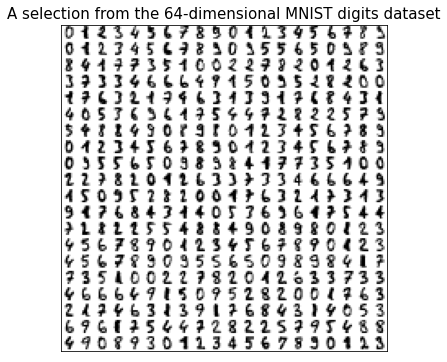

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from time import time

digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
        
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.rcParams['figure.figsize'] = [6, 6]
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional MNIST digits dataset', fontsize=15);

... computing IsoMap embedding


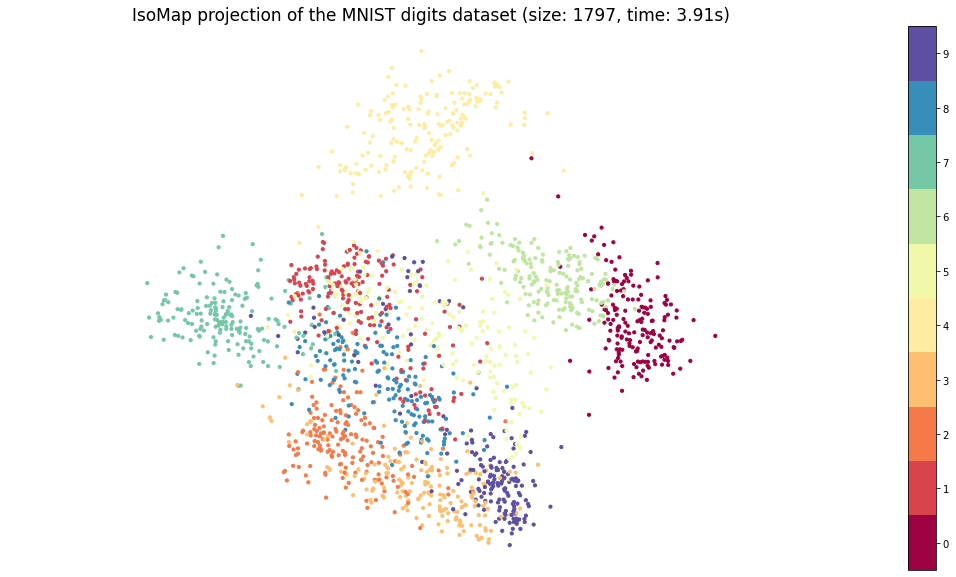

In [2]:
def scatterplot_digits(embedding, algorithm_name, time):
    plt.rcParams['figure.figsize'] = [19, 10]
    plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=10)
    plt.gca().set_aspect('equal', 'datalim')
    plt.axis('off') # ho tolto anche gli assi
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(f'{algorithm_name} projection of the MNIST digits dataset (size: {len(embedding)}, time: {round(time,2)}s)', fontsize=15);
    
print("... computing IsoMap embedding")
t0 = time()
X_iso = Isomap(n_neighbors=30, n_components=2).fit_transform(X)
scatterplot_digits(X_iso, 'IsoMap', time() - t0)